20230619 = Apenas treinamento, crossover + semantica, 100k avaliações, 500 população, <uop> com tudo

standard

In [1]:
import os
import glob
import pandas as pd
import plot as plot
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

dfs = []

# Set the root directory where you want to search for "res.csv"
root_directory = 'fs/results'  # Replace with your directory path

# Use the glob module to find all files named "res.csv" recursively
csv_files = glob.glob(os.path.join(root_directory, '**', 'res.csv'), recursive=True)

# Print the paths of all found "res.csv" files
for file in csv_files:
    df = pd.read_csv(file, sep = ";")

    # fs/results/f11/500/original/SC1-GGP/res.csv

    df['problem'] = [file.split('/')[2] for i in range(len(df))]
    df['amount'] = [file.split('/')[3] for i in range(len(df))]
    df['noise'] = [file.split('/')[4] for i in range(len(df))]
    df['variation'] = [file.split('/')[5] for i in range(len(df))]
    df['seed_file'] = [str(seed) + '.hist' for seed in df.seed]
    
    dfs.append(df)
            
results = pd.concat(dfs)
results.columns = ['seed' , 'time', 'training', 'test', 'validation', 'model', 'constants', 'problem', 'amount', 'noise', 'variation', 'seed_file']
results["training"] = pd.to_numeric(results["training"])
results["test"] = pd.to_numeric(results["test"])
results["validation"] = pd.to_numeric(results["validation"])
results = results.reset_index(drop=True)
results

AttributeError: 'DataFrame' object has no attribute 'seed'

In [ ]:
print(results.problem.unique())
print(results.variation.unique())   

['f8' 'f5' 'f9' 'f2' 'f7' 'f6' 'f1']
['RSC' 'SAC' 'FVSC' 'DEF' 'SCPS' 'SSC']


In [ ]:
# results = results[results.variation.isin(['GGP', 'SC1-GGP', 'SC2-GGP'])]
# results = results[results.variation.isin(['GGP', 'SM1-GGP', 'SM2-GGP'])]
# results

In [ ]:
fit_model = 'training'

In [ ]:
grouped = results.groupby(['problem', 'amount', 'noise', 'variation'], as_index=False).agg({fit_model: ['count', 'min', 'mean', 'median', 'max', 'std']})
grouped

problem amount     noise variation training                           \
                                          count         min         mean   
0        f1    100     noise       DEF      100    0.107476     4.240318   
1        f1    100     noise      FVSC      100    0.132685     6.003975   
2        f1    100     noise       RSC      100    1.678897     4.682436   
3        f1    100     noise       SAC      100    1.588290     5.883305   
4        f1    100     noise      SCPS      100    2.389802     5.916364   
..      ...    ...       ...       ...      ...         ...          ...   
322      f9    500  original      FVSC       47  291.800925  1409.191506   
323      f9    500  original       RSC       50  114.348347   637.297538   
324      f9    500  original       SAC       40  345.293174  1378.613511   
325      f9    500  original      SCPS       40  487.952922  1550.175922   
326      f9    500  original       SSC       40  160.243605   493.404228   

                                           
          median          max         std  
0       4.345603     6.557777    1.933147  
1       6.244905     7.660093    1.016865  
2       4.794303     6.557777    1.458043  
3       6.181276     7.517613    0.955064  
4       6.341868     7.660093    0.996354  
..           ...          ...         ...  
322  1460.212915  3059.231671  617.784327  
323   594.033911  1814.828923  330.203606  
324  1356.384628  3727.992318  716.704282  
325  1375.595842  3000.999587  608.101008  
326   450.813853  1240.268559  265.727305  

[327 rows x 10 columns]

In [ ]:
grouped.loc[(grouped.problem == "f1") & (grouped.amount == "50")]

problem amount     noise variation training                          \
                                         count           min      mean   
24      f1     50     noise       DEF      100  2.377968e-01  4.747378   
25      f1     50     noise      FVSC      100  1.876466e-01  6.221408   
26      f1     50     noise       RSC      100  7.062253e-01  5.244221   
27      f1     50     noise       SAC      100  3.002270e+00  6.241810   
28      f1     50     noise      SCPS      100  3.187355e+00  6.239337   
29      f1     50     noise       SSC      100  1.260946e-01  2.794516   
30      f1     50  original       DEF      100  8.284816e-03  4.358631   
31      f1     50  original      FVSC      100  2.753451e+00  5.945126   
32      f1     50  original       RSC      100  1.624015e+00  5.127241   
33      f1     50  original       SAC      100  2.682840e+00  6.140850   
34      f1     50  original      SCPS      100  2.878754e+00  6.073833   
35      f1     50  original       SSC      100  3.315681e-31  2.638347   

                                  
      median       max       std  
24  4.862511  6.963944  1.975355  
25  6.725864  7.996557  1.329619  
26  5.388415  7.228348  1.576739  
27  6.778122  8.374792  1.192931  
28  6.765074  8.555276  1.185217  
29  2.093940  6.963944  2.380407  
30  4.739896  7.305057  2.343692  
31  6.545067  7.619583  1.316561  
32  5.136298  7.063840  1.508060  
33  6.725696  8.105428  1.269636  
34  6.655637  7.872600  1.243210  
35  2.248440  6.708765  2.232876

In [ ]:
grouped['minimum'] = grouped[fit_model]['median']

melhor_resultado_variacao = grouped.loc[grouped.groupby(['problem', 'amount', 'noise']).minimum.idxmin()].reset_index()
melhor_resultado_variacao.to_csv("melhor_resultado_variacao.csv")
melhor_resultado_variacao

index problem amount     noise variation training                \
                                               count           min   
0      5      f1    100     noise       SSC      100  1.500309e-02   
1     11      f1    100  original       SSC      100  1.340138e-31   
2     17      f1   1000     noise       SSC      100  6.156157e-03   
3     23      f1   1000  original       SSC      100  2.695463e-31   
4     29      f1     50     noise       SSC      100  1.260946e-01   
5     35      f1     50  original       SSC      100  3.315681e-31   
6     41      f1    500     noise       SSC      100  5.042022e-02   
7     47      f1    500  original       SSC      100  2.979384e-31   
8     53      f2    100     noise       SSC      100  4.415595e+01   
9     59      f2    100  original       SSC      100  3.801968e+00   
10    60      f2   1000     noise       DEF      100  5.424238e+01   
11    71      f2   1000  original       SSC      100  1.875569e+00   
12    77      f2     50     noise       SSC      100  2.284675e+01   
13    83      f2     50  original       SSC      100  1.958939e+00   
14    89      f2    500     noise       SSC      100  5.124325e+01   
15    95      f2    500  original       SSC      100  1.833953e+00   
16   101      f5    100     noise       SSC      100  3.539627e-02   
17   107      f5    100  original       SSC      100  2.566042e-31   
18   113      f5   1000     noise       SSC      100  9.607994e-03   
19   119      f5   1000  original       SSC      100  3.206977e-31   
20   125      f5     50     noise       SSC      100  8.203045e-02   
21   131      f5     50  original       SSC      100  2.091657e-31   
22   137      f5    500     noise       SSC      100  2.569053e-06   
23   143      f5    500  original       SSC      100  3.046992e-31   
24   149      f6    100     noise       SSC      100  6.444571e+00   
25   155      f6    100  original       SSC      100  2.483875e+00   
26   158      f6   1000     noise       RSC      100  4.077431e+01   
27   167      f6   1000  original       SSC      100  1.844428e+00   
28   173      f6     50     noise       SSC      100  9.621138e+00   
29   176      f6     50  original       RSC      100  1.453346e+00   
30   180      f6    500     noise       DEF      100  5.725458e+01   
31   188      f6    500  original       RSC      100  2.173674e+00   
32   197      f7    100     noise       SSC      100  7.046845e+01   
33   198      f7    100  original       DEF      100  2.029340e+00   
34   209      f7   1000     noise       SSC      100  3.484753e+01   
35   210      f7   1000  original       DEF      100  1.979869e+00   
36   216      f7     50     noise       DEF      100  6.349986e+00   
37   224      f7     50  original       RSC      100  2.453364e+00   
38   233      f7    500     noise       SSC      100  5.663721e+01   
39   236      f7    500  original       RSC      100  1.977674e+00   
40   245      f8    100     noise       SSC      100  9.903940e-02   
41   251      f8    100  original       SSC      100  9.088219e-04   
42   257      f8   1000     noise       SSC       66  2.666426e-02   
43   263      f8   1000  original       SSC       90  2.776275e-03   
44   269      f8     50     noise       SSC      100  6.672126e-02   
45   275      f8     50  original       SSC      100  5.132744e-04   
46   281      f8    500     noise       SSC      100  1.140150e-01   
47   287      f8    500  original       SSC      100  1.481251e-03   
48   293      f9    100     noise       SSC       60  2.441637e+02   
49   299      f9    100  original       SSC       60  5.402354e+01   
50   300      f9   1000  original       DEF       10  2.326013e+02   
51   308      f9     50     noise       SSC       60  3.919380e+01   
52   314      f9     50  original       SSC       60  1.309841e+01   
53   320      f9    500     noise       SSC       20  7.684905e+02   
54   326      f9    500  original       SSC       40  1.602436e+02   

            

In [ ]:
melhor_resultado_variacao['variation'].value_counts()

variation
SSC    44
DEF     6
RSC     5
Name: count, dtype: int64

In [ ]:
print("Sem ruído", melhor_resultado_variacao[melhor_resultado_variacao.noise == "original"]['variation'].value_counts())
print("Com ruído", melhor_resultado_variacao[melhor_resultado_variacao.noise == "noise"]['variation'].value_counts())

Sem ruído variation
SSC    21
RSC     4
DEF     3
Name: count, dtype: int64
Com ruído variation
SSC    23
DEF     3
RSC     1
Name: count, dtype: int64


In [ ]:
matrix = {}

for variation in grouped.variation.unique():
    matrix[variation] = {
        'original_50': 0,
        'original_100': 0,
        'original_500': 0,
        'original_1000': 0,
        'noise_50': 0,
        'noise_100': 0,
        'noise_500': 0,
        'noise_1000': 0
    }

for i, row in melhor_resultado_variacao.iterrows():
    matrix[row['variation'][0]][row["noise"][0] + "_" + row["amount"][0]] = matrix[row['variation'][0]][row["noise"][0] + "_" + row["amount"][0]] + 1

# Create DataFrame from the list of dictionaries
best_grouped = pd.DataFrame.from_dict(matrix, orient = "index")
row_sums = best_grouped.iloc[:, 1:-1].sum(axis=1)
best_grouped["n_best"] = row_sums[::-1]
best_grouped = best_grouped.sort_values(by = "n_best", ascending = False)
best_grouped

,original_50,original_100,original_500,original_1000,noise_50,noise_100,noise_500,noise_1000,n_best
SSC,5,6,5,5,6,7,6,4,35
DEF,0,1,0,2,1,0,1,1,5
RSC,2,0,2,0,0,0,0,1,2
FVSC,0,0,0,0,0,0,0,0,0
SAC,0,0,0,0,0,0,0,0,0
SCPS,0,0,0,0,0,0,0,0,0


In [ ]:
matrix = {}

for variation in grouped.variation.unique():
    matrix[variation] = {}
    for problem in grouped.problem.unique():
        for noise in grouped.noise.unique():
            matrix[variation][problem + "_" + noise] = 0


for i, row in melhor_resultado_variacao.iterrows():
    matrix[row['variation'][0]][row["problem"][0] + "_" + row["noise"][0]] = matrix[row['variation'][0]][row["problem"][0] + "_" + row["noise"][0]] + 1

# Create DataFrame from the list of dictionaries
best_grouped = pd.DataFrame.from_dict(matrix, orient = "index")
row_sums = best_grouped.iloc[:, 1:-1].sum(axis=1)
best_grouped["n_best"] = row_sums[::-1]
best_grouped = best_grouped.sort_values(by = "n_best", ascending = False)
best_grouped

,f1_noise,f1_original,f2_noise,f2_original,f5_noise,f5_original,f6_noise,f6_original,f7_noise,f7_original,f8_noise,f8_original,f9_noise,f9_original,n_best
SSC,4,4,3,4,4,4,2,2,3,0,4,4,3,3,37
DEF,0,0,1,0,0,0,1,0,1,2,0,0,0,1,5
RSC,0,0,0,0,0,0,1,2,0,2,0,0,0,0,5
FVSC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SAC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SCPS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# problems_median = {}
# for problem in grouped.problem.unique():
#     problems_median[problem] = {}

#     for amount in grouped.amount.unique():
#         problems_median[problem][amount] = {}

#         for noise in grouped.noise.unique():
#             df = pd.read_csv("fs/" + problem + "/" + amount + "/" + noise + "/data", skiprows=2, header=None, sep=" ")
#             problems_median[problem][amount][noise] = df.iloc[:, -1].median()

# problems_median
            

In [ ]:
from cycler import cycler

In [ ]:
import random

def generate_high_contrast_colors(num_colors):
    colors = []
    for _ in range(num_colors):
        # Generate random RGB values
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)

        # Ensure high contrast by making the color complementary
        r_comp = 255 - r
        g_comp = 255 - g
        b_comp = 255 - b

        # Convert RGB to hex
        hex_color = "#{:02X}{:02X}{:02X}".format(r, g, b)
        hex_comp_color = "#{:02X}{:02X}{:02X}".format(r_comp, g_comp, b_comp)

        # Append both the color and its complementary color to the list
        colors.extend([hex_color, hex_comp_color])

    return colors

# Generate a list of 10 high contrast colors
high_contrast_colors = generate_high_contrast_colors(5)

# Print the list of colors
print(high_contrast_colors)

['#FFF3D1', '#000C2E', '#2D21EF', '#D2DE10', '#D21F99', '#2DE066', '#675BDD', '#98A422', '#91E9A3', '#6E165C']


10 12
f1


ValueError: No objects to concatenate

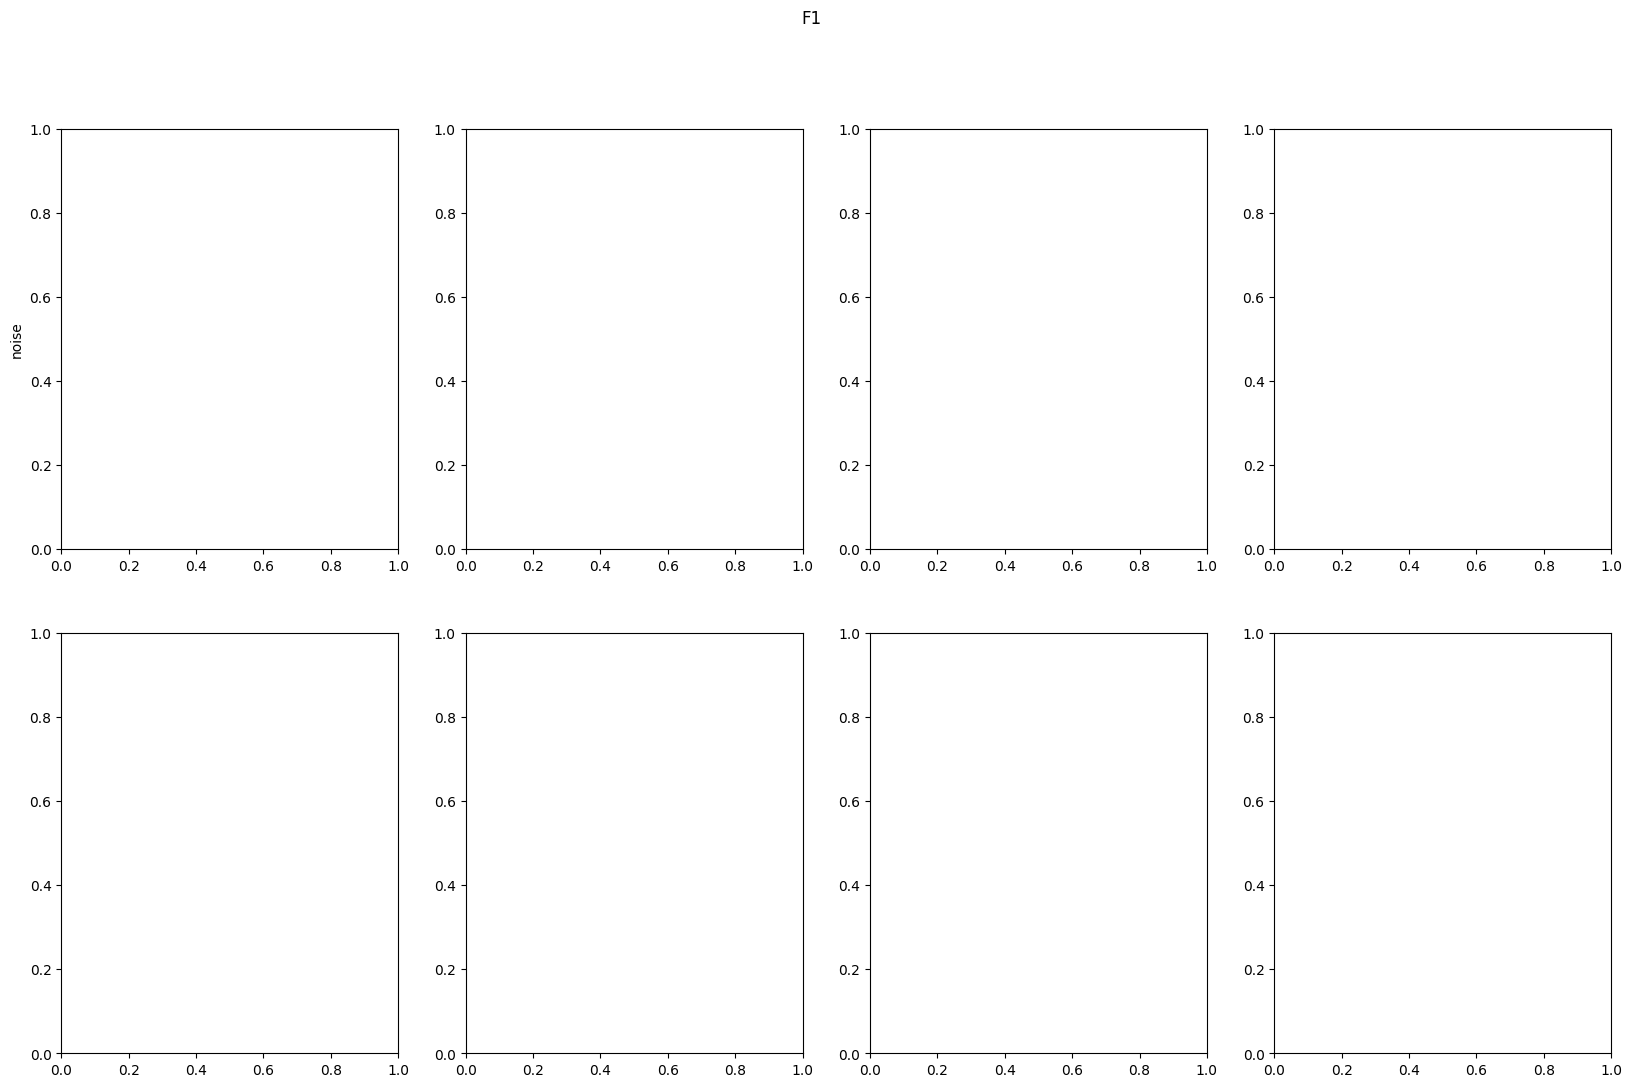

In [ ]:
marker_styles = ['.', ',', 'o', 'v', '^', '<', '>', 's', 'p', '*', '+', 'x', 'D', 'd', 'h', 'H', '8']

linestyle_tuple = [
     (0, (1, 2)),
     (0, (1, 1)),
     (5, (10, 3)),
     (0, (5, 10)),
     (0, (5, 5)),
     (0, (5, 1)),
     (0, (3, 10, 1, 10)),
     (0, (3, 3, 1, 5)),
     (0, (3, 1, 1, 1)),
     (0, (3, 5, 1, 5, 1, 5)),
     (0, (3, 10, 1, 10, 1, 10)),
     (0, (3, 1, 1, 1, 1, 1))]

n_colors = 10
n_styles = len(linestyle_tuple)

print(n_colors, n_styles)

for problem in grouped.problem.unique():
    print(problem)
    fig, axs = plt.subplots(2, 4, figsize=(20, 12))
    fig.suptitle(problem.upper())
    
    c = 0

    for amount in ["50", "100", "500", "1000"]:
        r = 0
        
        for noise in grouped.noise.unique():
            axs[r, 0].set_ylabel(noise)
            v = 0

            # Base Constant Model
            # median_error = [problems_median[problem][amount][noise]]
            # axs[r, c].plot([i for i in range(50)], [problems_median[problem][amount][noise] for i in range(50)], label="median")

            min_value = np.inf
            min_variation = ""
            
            for variation in ["GGP", "FVSC-GGP", "RSC-GGP", "SAC-GGP", "SSC-GGP", "SCPS-GGP"]: #grouped.variation.unique():

                hist_dfs = []

                for i, row in results.loc[(results.problem == problem) & (results.amount == amount) & (results.noise == noise) & (results.variation == variation)].iterrows():
                    hist_df = pd.read_csv("fs/results/" + row['problem'] + '/' + row['amount'] + '/' + row['noise'] + "/" + row['variation'] + '/' + row['seed_file'], sep=";", header=None)
                    hist_df.columns = [row['seed_file'], 'time']
                    hist_dfs.append(hist_df[[row['seed_file']]])

                hist_dfs = pd.concat(hist_dfs, axis=1)
                hist_dfs[variation + " avg"] = hist_dfs.median(numeric_only=True, axis=1)
                hist_dfs[variation + " std"] = hist_dfs.std(numeric_only=True, axis=1)
                
                axs[r, c].plot(hist_dfs.index, hist_dfs[variation + " avg"], lw=2, label=variation, linestyle = linestyle_tuple[v % len(linestyle_tuple)])
                # axs[r, c].fill_between(hist_dfs.index, hist_dfs[variation + " avg"] + hist_dfs[variation + " std"], hist_dfs[variation + " avg"] - hist_dfs[variation + " std"], alpha=0.3)

                v = v + 1

            axs[r, c].set_title(str(amount))
            axs[r, c].legend()
            axs[r, c].grid()
            
            r = r + 1
        c = c + 1

    plt.savefig(problem + ".svg", format="svg")
    plt.show()
